# Selections with matplotlib

In [1]:
import pandas as pd

filename='coma_lines.hdf'
coma_df = pd.read_hdf(filename)

In [2]:
coma_df

,ra,dec,z,distance,h_beta_flux,h_beta_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,nii_6584_flux,Type
0,188.54656,35.612766,0.021488,562.173471,21.08341,2.826998,73.75804,3.580931,83.83190,43.469760,SY
1,188.69674,35.781110,0.021702,565.918724,37.92557,2.400332,137.97110,2.760354,53.81482,24.242930,SF
2,185.38950,30.016099,0.023215,516.330726,40.44841,2.088908,119.65410,2.146284,39.07370,20.647430,SF
3,184.49480,29.085528,0.025326,555.056940,18.48220,2.269524,50.52201,1.741814,17.91993,9.147207,SF
4,188.42639,26.617367,0.023813,357.423077,21.02568,2.265875,74.20291,2.074113,32.63024,11.148950,SF
...,...,...,...,...,...,...,...,...,...,...,...
1829,190.29589,20.995968,0.022786,490.075531,24.96297,1.421310,67.08753,1.471178,23.04968,6.149015,SF
1830,190.31025,20.666189,0.022076,506.863806,75.90382,2.382163,286.12120,4.006925,25.05643,120.079300,SF
1831,189.49187,20.346436,0.022157,546.795345,51.96109,1.673405,163.82950,2.226180,36.32249,41.799070,SF
1832,189.41293,19.966747,0.022022,568.525429,96.22188,1.981368,281.62920,2.932447,216.60120,30.714190,SF


In [3]:
coma_df.columns

Index(['ra', 'dec', 'z', 'distance', 'h_beta_flux', 'h_beta_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'oiii_5007_flux', 'nii_6584_flux',
       'Type'],
      dtype='object')

In [4]:
from utils import plotBPT

?plotBPT

Signature: plotBPT(halpha, hbeta, nii, oiii)
Docstring: This function plots a BPT diagram
File:      ~/Carpentry/AstronomicalData/notebooks/utils.py
Type:      function

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='log([NII]/H$\\alpha$)', ylabel='log([OIII]/H$\\beta$)'>)

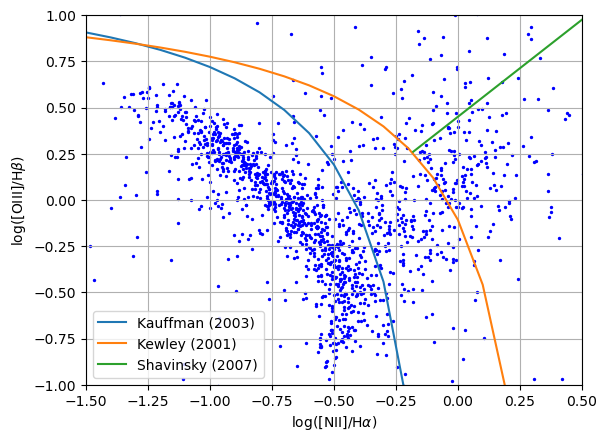

In [5]:
plotBPT(coma_df['h_alpha_flux'],
        coma_df['h_beta_flux'],
        coma_df['nii_6584_flux'],
        coma_df['oiii_5007_flux'])

# Define a polygon

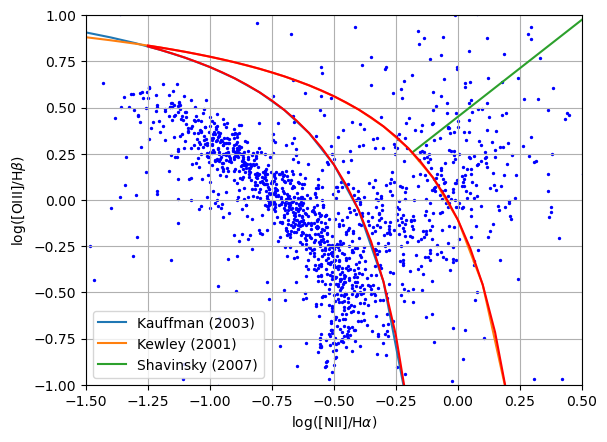

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plotBPT

xl = np.arange(-1.25,-0.18,0.05)
yl = 0.61/(xl-0.05)+1.3
xt = np.arange(-1.25,0.23,0.05)
yt = 0.61/(xt-0.47) + 1.19
xtr = xt[::-1]
ytr = yt[::-1]

x_loop = np.append(xl, xtr)
y_loop = np.append(yl, ytr)

fig, ax = plotBPT(coma_df['h_alpha_flux'],
        coma_df['h_beta_flux'],
        coma_df['nii_6584_flux'],
        coma_df['oiii_5007_flux'])

ax.plot(x_loop, y_loop, color='red')


In [8]:
loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()

,x_loop,y_loop
0,-1.25,0.830769
1,-1.20,0.812000
2,-1.15,0.791667
3,-1.10,0.769565
4,-1.05,0.745455


In [9]:
from matplotlib.patches import Polygon

polygon_comp = Polygon(loop_df, facecolor='red', alpha=0.2)
polygon_comp

In [10]:
points = [(0,-0.75), 
          (-0.5,-0.5)]
polygon_comp.contains_points(points)

array([ True, False])

In [11]:
bpt_df = pd.DataFrame()
bpt_df['NII_Ha'] = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
bpt_df['OIII_Hb'] = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])
bpt_df.head()

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NII_Ha,OIII_Hb
0,-0.229622,0.599468
1,-0.755203,0.151970
2,-0.763062,-0.015017
3,-0.742192,-0.013417
4,-0.823187,0.190870


In [12]:
inside_mask_comp = polygon_comp.contains_points(bpt_df)
inside_mask_comp

array([False, False, False, ..., False, False, False], shape=(1834,))

## Exercise

Can you find the number of points inside the composite region by using the mask ?

In [13]:
inside_mask_comp.sum()

np.int64(213)

# Select points inside the mask

In [14]:
composite_df = coma_df[inside_mask_comp]

In [15]:
len(composite_df)

213

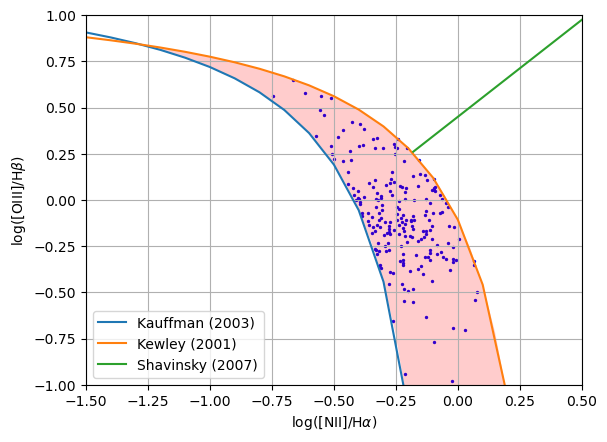

In [16]:
fig, ax = plotBPT(composite_df['h_alpha_flux'],
        composite_df['h_beta_flux'],
        composite_df['nii_6584_flux'],
        composite_df['oiii_5007_flux'])
ax.add_patch(polygon_comp)
plt.show()

# Exercise

Define a polygon for the LINERs which are:

- on the right of the Kewley line (orange)
- under the Shavinksy line (green)

Define x_loop and y_loop and plot the loop:
plt.plot(x_loop, y_loop)

The two curves intersect at x:

x0 = -0.18380687748557267

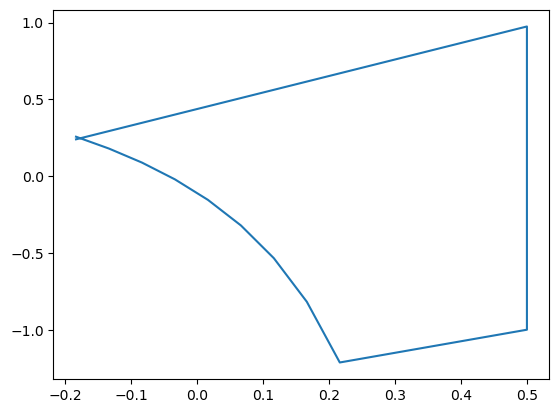

In [17]:
x0 = -0.18380687748557267
x1 = np.arange(x0, 0.23, 0.05)
y1 = 0.61/(x1 - 0.47) + 1.19
x_loop = np.append(x1, np.array([0.5,0.5,x0]))
y_loop = np.append(y1, np.array([-1,1.05*0.5+0.45, -1.05*0.2+0.45]))
plt.plot(x_loop, y_loop)

In [20]:
from matplotlib.patches import Polygon

loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()

polygon_liner = Polygon(loop_df, facecolor='orange', alpha=0.2)
inside_mask_liner = polygon_liner.contains_points(bpt_df)
liner_df = coma_df[inside_mask_liner]

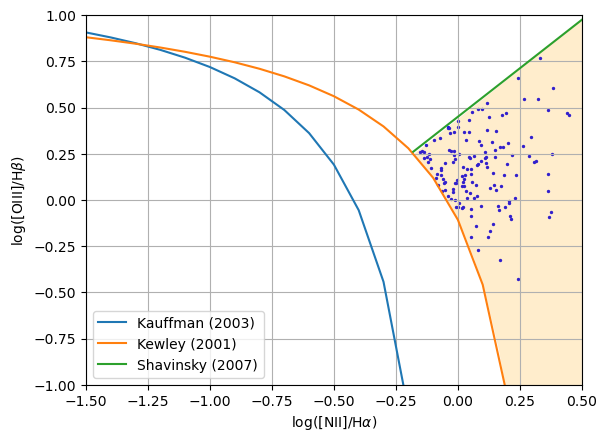

In [21]:
fig, ax = plotBPT(liner_df['h_alpha_flux'],
        liner_df['h_beta_flux'],
        liner_df['nii_6584_flux'],
        liner_df['oiii_5007_flux'])
ax.add_patch(polygon_liner)
plt.show()

# Exercise

inside_mask_sf  for points under the Kauffman line

inside_mask_sy  for points right of the Kewley line and over the Shavinksy line

# Back at 1 PM  and finishing before 3 PM